In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
# from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [4]:
file1 = "../data/processed/encoded_data.csv"

ChunkSize = 100000
i = 1
for chunk in pd.read_csv(file1, chunksize=ChunkSize, low_memory=False):
    data = chunk if i == 1 else pd.concat([data, chunk])
    print('-->Read Chunk...', i)
    i += 1



-->Read Chunk... 1
-->Read Chunk... 2
-->Read Chunk... 3
-->Read Chunk... 4
-->Read Chunk... 5


In [5]:
data.columns = data.columns.str.replace(' ', '')
"+ ".join(data.drop('Late_Loan', axis=1).columns)

'loan_amnt+ int_rate+ emp_length+ annual_inc+ dti+ open_act_il+ il_util+ open_rv_12m+ inq_last_12m+ acc_open_past_24mths+ mort_acc+ num_tl_op_past_12m+ tot_hi_cred_lim+ total_bc_limit+ term_36months+ term_60months+ home_ownership_ANY+ home_ownership_MORTGAGE+ home_ownership_NONE+ home_ownership_OTHER+ home_ownership_OWN+ home_ownership_RENT+ initial_list_status_f+ initial_list_status_w'

In [6]:
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



# y = data['Late_Loan']

sm = SMOTE(random_state=42)

Y,X = dmatrices('Late_Loan ~ loan_amnt+ int_rate+ emp_length+ annual_inc+ dti+ open_act_il+ il_util+ open_rv_12m+ inq_last_12m+ acc_open_past_24mths+ mort_acc+ num_tl_op_past_12m+ tot_hi_cred_lim+ total_bc_limit+ term_36months+ term_60months+ home_ownership_ANY+ home_ownership_MORTGAGE+ home_ownership_NONE+ home_ownership_OTHER+ home_ownership_OWN+ home_ownership_RENT+ initial_list_status_f+ initial_list_status_w',data, return_type = 'dataframe')
X_columns = X.columns

sm = SMOTE(random_state=42)
X, Y = sm.fit_sample(X, Y)
X = pd.DataFrame(X,columns=X_columns)

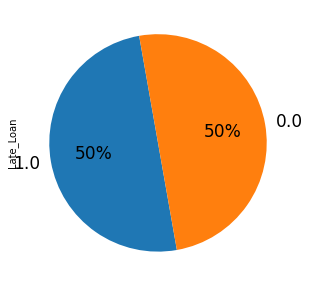

In [7]:
#distribution of our class/targer variable Late_Loan , True if loan is late. 

Y_df = pd.DataFrame(Y,columns=['Late_Loan'])
plt.figure(figsize=(5,5))
Y_df['Late_Loan'].value_counts().plot(kind = 'pie',autopct='%.0f%%', startangle=100, fontsize=17)
plt.show()

In [8]:
Y_df.value_counts()

Late_Loan
1.0          332649
0.0          332649
dtype: int64

In [9]:
# y_true=data['Late_Loan']
# data.drop(['Late_Loan'], axis=1, inplace=True)

In [10]:
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(data)

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [12]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
print(train_distr)
train_len = len(y_train)
print("Class 0: ",round(int(train_distr[0])/train_len, 2),"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Counter({'Late_Loan': 1})
Class 0:  0.0 Class 1:  0.0
---------- Distribution of output variable in test data ----------
Class 0:  0.0 Class 1:  0.0


In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    print ("-"*20," "*5, "ACCUARACY SCORE", " "*5, "-"*20)
    print(" "*10, "Accuracy score for model is : ", round(accuracy_score(test_y, predict_y),4))
    print ("-"*69)
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    
    
def print_report(test_y, test_predict):
    from sklearn.metrics import confusion_matrix
    
    
    print(confusion_matrix(test_y, test_predict))

    from sklearn.metrics import classification_report
    print(classification_report(test_y, test_predict))
    
def plot_roc(test_y, test_probs):
    fpr, tpr, threshold = roc_curve(test_y, test_probs)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Random Model

In [14]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])


print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))
# print("accuracy on Test Data using Random Model",accuracy_score(y_test, predicted_y))



Log loss on Test Data using Random Model 0.8851519077655863


In [15]:
## Traning Data


--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.5013
---------------------------------------------------------------------


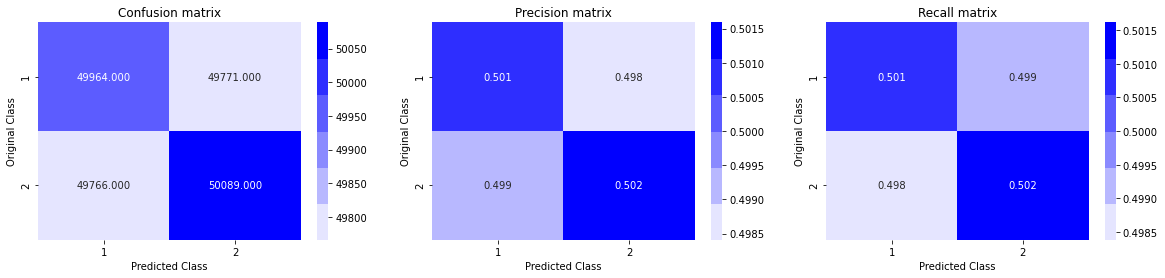

[[49964 49771]
 [49766 50089]]
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     99735
         1.0       0.50      0.50      0.50     99855

    accuracy                           0.50    199590
   macro avg       0.50      0.50      0.50    199590
weighted avg       0.50      0.50      0.50    199590



In [16]:
## Testing Data
predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)
print_report(y_test, predicted_y)

# SGD Classifier using Logistic Regression

C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


For values of alpha =  1e-05 The log loss is: 0.6712555148329298
For values of alpha =  1e-05 The accuracy is: 0.5863921038128163


C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


For values of alpha =  0.0001 The log loss is: 0.6712555148307024
For values of alpha =  0.0001 The accuracy is: 0.5863921038128163


C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished


For values of alpha =  0.001 The log loss is: 0.6712555148304798
For values of alpha =  0.001 The accuracy is: 0.5863921038128163


C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


For values of alpha =  0.01 The log loss is: 0.6712555148304575
For values of alpha =  0.01 The accuracy is: 0.5863921038128163


C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


For values of alpha =  0.1 The log loss is: 0.6712555148304555
For values of alpha =  0.1 The accuracy is: 0.5863921038128163


C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


For values of alpha =  1 The log loss is: 0.6712555148304551
For values of alpha =  1 The accuracy is: 0.5863921038128163


C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


For values of alpha =  10 The log loss is: 0.6712555148304552
For values of alpha =  10 The accuracy is: 0.5863921038128163


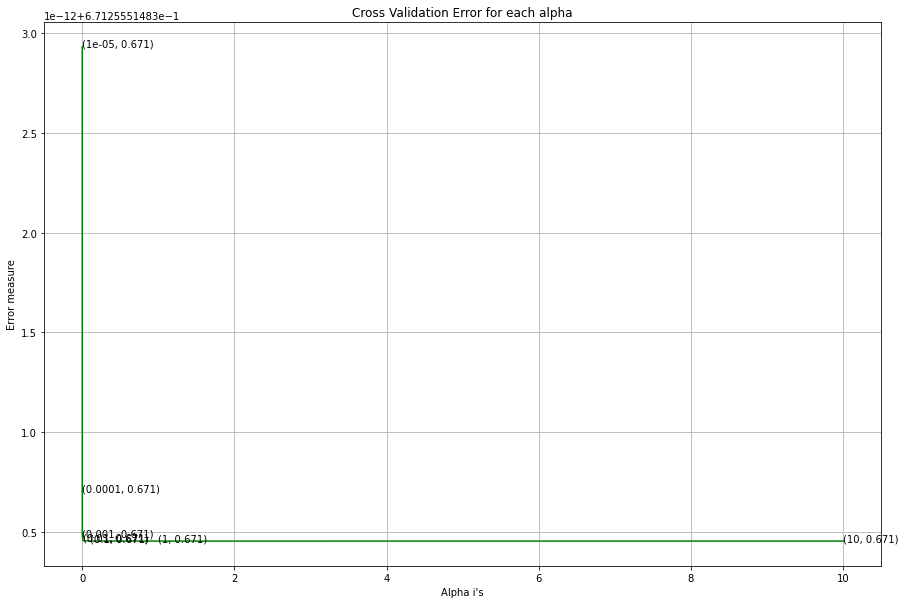

C:\Users\Rishbha\Anaconda3\envs\lending_club\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For values of best alpha =  1 The train log loss is: 0.671536903735927
For values of best alpha =  1 The test log loss is: 0.6712555148304555
Total number of data points : 199590


In [22]:
alpha = [10 ** x for x in range(-5, 2)]  # hyperparam for SGD classifier.



# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.



log_error_array=[]
accuracy_array = []
for i in (alpha):
    lr = LogisticRegression(C=i, penalty='l2', solver='lbfgs',max_iter=1000, random_state=42,  verbose=1)
    lr.fit(X_train, y_train)
    predict_y = lr.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=lr.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=lr.classes_, eps=1e-15))
    predict_y = lr.predict(X_test)
    accuracy_array.append(accuracy_score(y_test, predict_y))
    print('For values of alpha = ', i, "The accuracy is:",accuracy_score(y_test, predict_y))

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = LogisticRegression(C=0.1, penalty='l2',  random_state=42, max_iter=1000)
clf.fit(X_train, y_train)


predict_y = clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
# plot_confusion_matrix(y_test, predicted_y)

# Training Result

--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.5864
---------------------------------------------------------------------


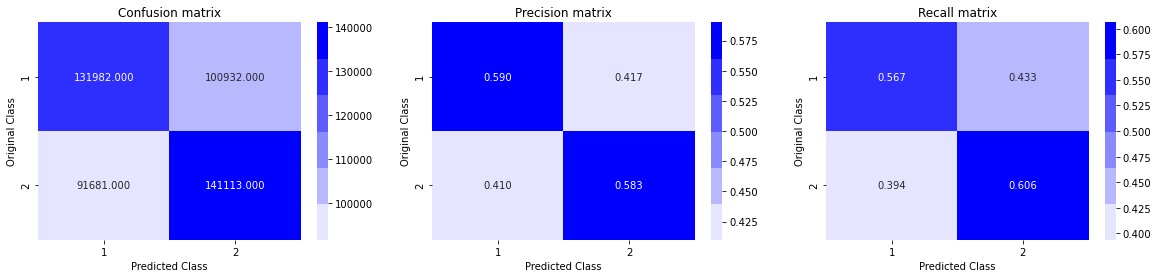

[[131982 100932]
 [ 91681 141113]]
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58    232914
         1.0       0.58      0.61      0.59    232794

    accuracy                           0.59    465708
   macro avg       0.59      0.59      0.59    465708
weighted avg       0.59      0.59      0.59    465708



In [24]:
## Training Data
predicted_y =clf.predict(X_train)
plot_confusion_matrix(y_train, predicted_y)
print_report(y_train, predicted_y)


# Testing Result

--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.5864
---------------------------------------------------------------------


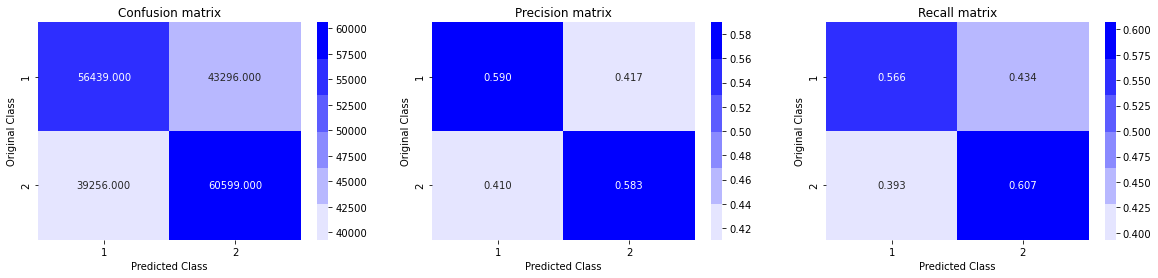

[[56439 43296]
 [39256 60599]]
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58     99735
         1.0       0.58      0.61      0.59     99855

    accuracy                           0.59    199590
   macro avg       0.59      0.59      0.59    199590
weighted avg       0.59      0.59      0.59    199590



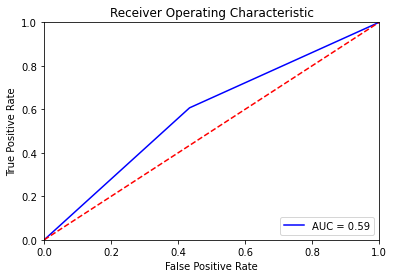

In [25]:
## Testing Dataset

## Testing Data
predicted_y =clf.predict(X_test)
plot_confusion_matrix(y_test, predicted_y)
print_report(y_test, predicted_y)
plot_roc(y_test, predicted_y)

# Gradient Boosting

In [26]:
parameters = {'nthread':4, #when use hyperthread, xgboost may become slower
              'objective':'binary:logistic',
              'learning_rate': 0.02, #so called `eta` value
              'max_depth': 6,
              'min_child_weight': 11,
              'silent': 1,
              'subsample': 0.8,
              'colsample_bytree': 0.7,
              'n_estimators': 5, #number of trees, change it to 1000 for better results
              'missing':-999,
              'seed': 1337}

import xgboost as xgb

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(parameters, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[20:11:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { missing, n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.20878	valid-error:0.20885
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 20 rounds.
[10]	train-error:0.17697	valid-error:0.17664
[20]	train-error:0.17314	valid-error:0.17268
[30]	train-error:0.16895	valid-error:0.16836
[40]	train-error:0.16461	valid-error:0.16432
[50]	train-error:0.16243	valid-error:0.16187
[60]	train-error:0.16202	valid-error:0.16153
[70]	train-error:0.16071	valid-error:0.15997
[80]	train-error:0.15923	valid-error:0.15835
[90]	train-error:0.15810	valid-error:0.157

## Train Dataset

--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.8654
---------------------------------------------------------------------


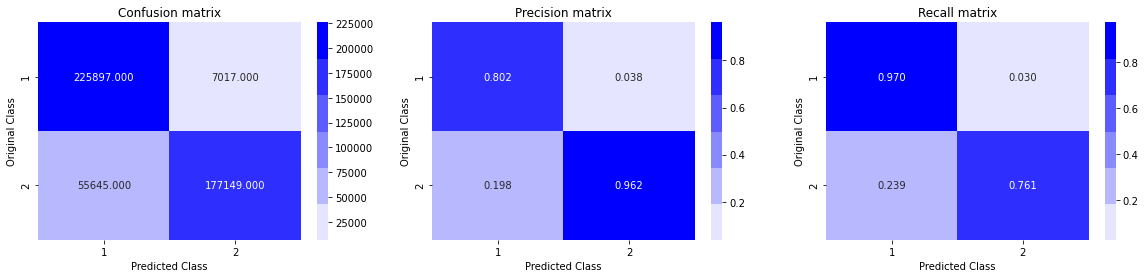

[[225897   7017]
 [ 55645 177149]]
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88    232914
         1.0       0.96      0.76      0.85    232794

    accuracy                           0.87    465708
   macro avg       0.88      0.87      0.86    465708
weighted avg       0.88      0.87      0.86    465708



In [27]:
predict_y_train = bst.predict(d_train)
predicted_y_train =np.array(predict_y_train > 0.5,dtype=int)
plot_confusion_matrix(y_train, predicted_y_train)
print_report(y_train, predicted_y_train)


## Test Dataset

Total number of data points : 199590
--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.8641
---------------------------------------------------------------------


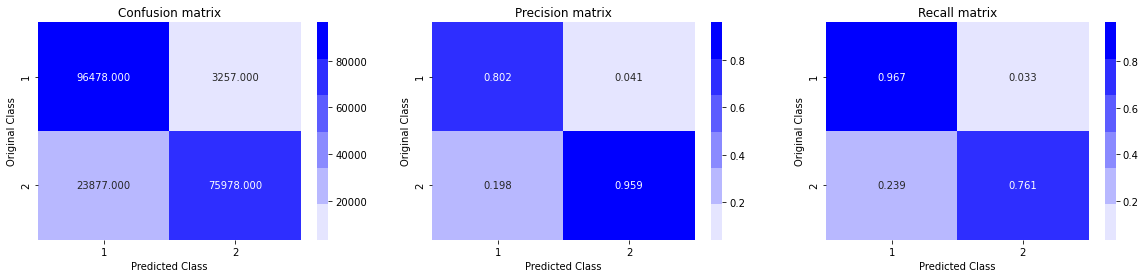

[[96478  3257]
 [23877 75978]]
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88     99735
         1.0       0.96      0.76      0.85     99855

    accuracy                           0.86    199590
   macro avg       0.88      0.86      0.86    199590
weighted avg       0.88      0.86      0.86    199590



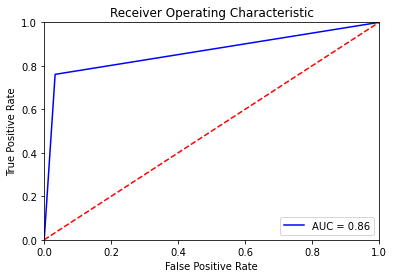

In [28]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print_report(y_test, predicted_y)
plot_roc(y_test, predicted_y)

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=False, max_features=25, n_estimators=50, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)
predicted_y = rf.predict(X_test)




<ipython-input-31-01a3006955ec>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.8min


building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.1s finished


In [32]:
# #find the best model of grid search
# grid_search_forest.best_estimator_

In [33]:
# #now let's how the RMSE changes for each parameter configuration
# cvres = grid_search_forest.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.5s finished


--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  1.0
---------------------------------------------------------------------


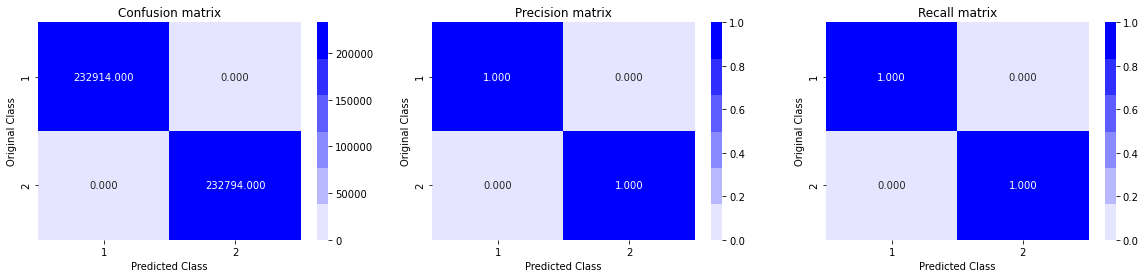

[[232914      0]
 [     0 232794]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    232914
         1.0       1.00      1.00      1.00    232794

    accuracy                           1.00    465708
   macro avg       1.00      1.00      1.00    465708
weighted avg       1.00      1.00      1.00    465708



In [34]:
predicted_y_train = rf.predict(X_train)
plot_confusion_matrix(y_train, predicted_y_train)

print_report(y_train, predicted_y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.2s finished


--------------------       ACCUARACY SCORE       --------------------
           Accuracy score for model is :  0.7976
---------------------------------------------------------------------


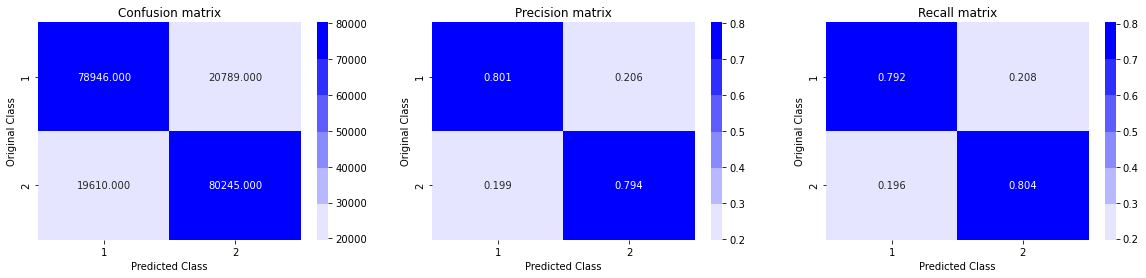

[[78946 20789]
 [19610 80245]]
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80     99735
         1.0       0.79      0.80      0.80     99855

    accuracy                           0.80    199590
   macro avg       0.80      0.80      0.80    199590
weighted avg       0.80      0.80      0.80    199590



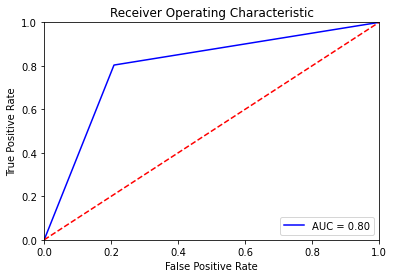

In [36]:
predicted_y_test = rf.predict(X_test)
plot_confusion_matrix(y_test, predicted_y_test)

print_report(y_test, predicted_y_test)
plot_roc(y_test, predicted_y_test)
